<a href="https://colab.research.google.com/github/viniciusgcjr/climaRH/blob/main/Relat%C3%B3rio_CRH_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório da disciplina de Clima e Recursos Hídricos

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Bras%C3%A3o_da_UFPE.png/161px-Bras%C3%A3o_da_UFPE.png"/>

UNIVERSIDADE FEDERAL DE PERNAMBUCO  
CENTRO DE TECNOLOGIA E GEOCIÊNCIAS  
DEPARTAMENTO DE ENGENHARIA CIVIL  
PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA CIVIL
  
___________________________      
VINÍCIUS GOMES COSTA JÚNIOR  

Recife, julho de 2021

</center>




## INTRODUÇÃO

A disciplina de Clima e Recursos Hídricos possui carga horária de 45 horas e é ministrada no âmbito do Programa de Pós-Graduação em Engenharia Civil da Universidade Federal de Pernambuco. A disciplina tem como objetivo conduzir o aluno a entender os conceitos básicos
relacionados a fenômenos que interferem na disponibilidade hídrica de bacias
hidrográficas como eventos de seca, variabilidade climática natural e mudanças
climáticas antropogênicas.

Este relatório tem o objetivo de demonstrar as técnicas aprendidas durante o
processo de aprendizagem desta disciplina no período compreendido entre 31 de
março de 2021 a 7 de julho de 2021.

Foram apresentados diversos softwares nesta disciplina, os alunos no entanto tinham liberdade para escolher os que mais se aderissem a eles. Este relatório foi produzido essencialmente na plataforma Colab do Google, com as linguagens python e R.

A atividades deste relatório se referem aos seguintes conteúdos: Obtenção de dados hidrológicos e meteorológicos; Implementação de métodos estátisticos; confecção de índices e exploração de dados referentes aos cenários climáticos do IPCC.

## RESULTADOS E DISCUSSÃO

## API ERA5

Primeiramente instalamos a interface de programaçao de aplicativos (API) do Climate Data Store.  

O manual da API pode ser visitado em: https://cds.climate.copernicus.eu/api-how-to

In [ ]:
!pip install cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.5.1-py2.py3-none-any.whl size=11699 sha256=ae5a3e84c893868bee7536b380e4b716ae0fac029fe88fb3f56d40165800643a
  Stored in directory: /root/.cache/pip/wheels/1d/2e/3c/3746e0cd076320584d6f47b688da7b13a5d5d1a92606779ca4
Successfully built cdsapi


Após o cadastro na plataforma cada usuário recebe uma UID e chave para utilizar a API. A chave para a variável key deve seguir um padrão similar a este:  

'key: 9911:a15b80a7-39d7-121c-b11d-876326074brop'

Como cada chave é individual importo a biblioteca getpass para que cada usuário possa inserir sua chave, quando este código for compartilhado.

In [ ]:
#importar getpass para solicitar a chave do usuário
import getpass

In [ ]:
url = 'url: https://cds.climate.copernicus.eu/api/v2'

UID_KEY = getpass.getpass()
key = 'key: ' + UID_KEY


··········


Para se utilizar a api se faz necessário criar um arquivo com as credenciais acima e guardalas no diretório root do computador. Como o google colab roda em um computador linux, criei este arquivo da seguinte maneira:

In [ ]:
with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

Importa-se então a api e deve-se executa-la para testar seu funcionamento.

In [ ]:
import cdsapi
cdsapi.Client()

Os dados gerados neste trabalho foram persistidos no google drive. Neste caso uma permissão para a montagem é necessária. A montagem desta nuvem no ambiente colab é feita da seguinte maneira:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Requisição de dados


A biblioteca xarray será utilizada uma vez que ela já integra as bibliotecas pandas e netcdf4, além de potencializar as operações que seriam possíveis no numpy.



    Produzi o seguinte GIF para demonstrar a facilidade de se obter o código necessário na API:

![API CDS](https://media.giphy.com/media/M3Ac8iCkTVMi3enu0r/giphy.gif)

In [ ]:
import xarray as xr #biblioteca para processar os dados
from urllib.request import urlopen

#leitura do dataset
c = cdsapi.Client()

# flag para o download data
download_flag = False

dataset = 'reanalysis-era5-single-levels-monthly-means'

# parametros da api
params = {
    'format': 'netcdf',
    'variable': ['total_precipitation', '2m_temperature'],
    'product_type': 'monthly_averaged_reanalysis',
    'expver': '1',
    'year': [
            '1981', '1982', '1983','1984', '1985', '1986','1987', '1988', '1989',
            '1990', '1991', '1992','1993', '1994', '1995','1996', '1997', '1998',
            '1999', '2000', '2001','2002', '2003', '2004','2005', '2006', '2007',
            '2008', '2009', '2010','2011', '2012', '2013','2014', '2015', '2016',
            '2017', '2018', '2019','2020'],
    'month':['01', '02', '03', '04', '05', '06', '07', '08', '09','10', '11', '12'],
    'time': '00:00',
    'area': [-7.15, -41.5, -9.6, -35],
    }

#Escolha de diretório no google drive
PernambucoERA5 = './drive/MyDrive/CRH/PernambucoERA5.nc'

#Arquivo gerado pelos paramêtros especificados
fl = c.retrieve(dataset, params)

#Caso a flag esteja como True o download do arquivo em netcdf será realizado e
#persistido no diretório especificado no google drive
if download_flag:
  fl.download(PernambucoERA5)

#leitura dos dados
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())
    print(ds)

2021-07-20 02:54:24,398 INFO Welcome to the CDS
2021-07-20 02:54:24,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2021-07-20 02:54:24,618 INFO Request is completed


<xarray.Dataset>
Dimensions:    (latitude: 10, longitude: 27, time: 480)
Coordinates:
  * longitude  (longitude) float32 -41.5 -41.25 -41.0 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -7.35 -7.6 -7.85 -8.1 ... -9.1 -9.35 -9.6
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-13 22:36:50 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...


Variáveis recuperadas:  


    tp         = total precipitation  
    t2m        = temperatura do ar (2m)

##### Mapa de temperatura do ar (2m) em 01/12/2020

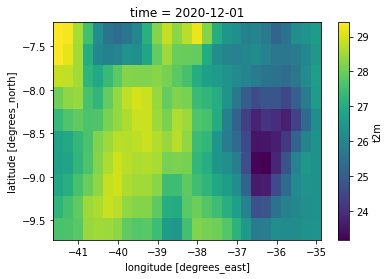

In [ ]:
temperatura = ds.t2m - 273.15 #convertendo de k para ºC
temperatura[479].plot()

#### Dataframe

A biblioteca pandas será utilizada para manipulação dos dados, sendo uma biblioteca elegante e poderosa para este fim.

In [ ]:
#Transformação dos dados em dataframe
df = ds.to_dataframe()

#Conversão de m para mm
df.loc[:,'tp'] = df.loc[:,'tp']*1000

#Conversão de K para ºC
df.loc[:,'t2m'] = df.loc[:,'t2m'] - 273.15

df

2021-07-20 02:54:26,696 INFO NumExpr defaulting to 2 threads.


tp        t2m
latitude longitude time                            
-7.35    -41.5     1981-01-01   4.351404  26.504205
                   1981-02-01   0.993128  28.256006
                   1981-03-01  10.961049  27.177423
                   1981-04-01   1.676493  26.214044
                   1981-05-01   0.006800  27.354944
...                                  ...        ...
-9.60    -35.0     2020-08-01   1.073591  25.054163
                   2020-09-01   1.157453  25.116876
                   2020-10-01   0.602148  25.923242
                   2020-11-01   1.075857  26.252618
                   2020-12-01   1.106078  26.365930

[129600 rows x 2 columns]

##### Descrição básica dos dados

In [ ]:
df.describe()

,tp,t2m
count,129600.000000,129600.000000
mean,1.658527,25.697175
std,2.050772,1.983663
min,0.000000,19.296411
25%,0.287475,24.311792
50%,0.930420,25.708582
75%,2.249176,27.066003
max,24.755669,32.821436


#### Ponto mais próximo ao posto meteorológico

É necessário criar uma função para determinar qual o ponto de grade no arquivo netcdf que mais se aproxima da estação meteorológica que será utilizada. Isto facilitará na produção de um script sem intervenção humana, deixando o processo bem mais automático e sem possíveis falhas.

In [ ]:
import numpy as np

def geo_idx(dd, dd_array):

   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx


Visualização do array de latitude e longitude do ERA5

In [ ]:
print(ds.variables['latitude'][:])
print(ds.variables['longitude'][:])

<xarray.IndexVariable 'latitude' (latitude: 10)>
array([-7.35, -7.6 , -7.85, -8.1 , -8.35, -8.6 , -8.85, -9.1 , -9.35, -9.6 ],
      dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude
<xarray.IndexVariable 'longitude' (longitude: 27)>
array([-41.5 , -41.25, -41.  , -40.75, -40.5 , -40.25, -40.  , -39.75, -39.5 ,
       -39.25, -39.  , -38.75, -38.5 , -38.25, -38.  , -37.75, -37.5 , -37.25,
       -37.  , -36.75, -36.5 , -36.25, -36.  , -35.75, -35.5 , -35.25, -35.  ],
      dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude


A estação escolhida para a comparação está localizada em Petrolina e pertece ao Instituto Nacional de Meteorologia (INMET).

As informações da estação podem ser visualizadas no site: https://mapas.inmet.gov.br/


![API CDS](https://media.giphy.com/media/oL6wz3cLib6jCxtxPJ/giphy.gif)

In [ ]:
#Estação 82983
inmet_lat = -9.39,
inmet_lon = -40.52

In [ ]:
lats_ERA5 = ds.variables['latitude'][:]
lons_ERA5 = ds.variables['longitude'][:]

lat_idx = geo_idx(inmet_lat, lats_ERA5)
lon_idx = geo_idx(inmet_lon, lons_ERA5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  """


Índices do array que correspondem o ponto da estação

In [ ]:
print(lat_idx.values)
print(lon_idx.values)

8
4


#### Série de precipitação

Série de precipitação para o ponto de grade que compreende a estação do INMET

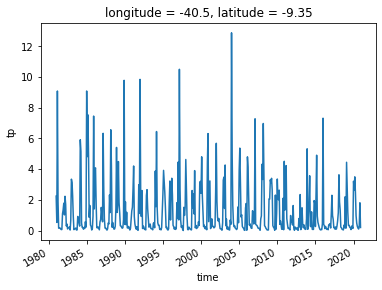

In [ ]:
tp = ds.tp * 1000 #ajuste de escala
tp.isel(latitude=8, longitude=4).plot()

#### Tabela filtrada

Como os dados do era são do tipo float, não é possível comparar diretamente o
valor de latitude e longitude, logo utiliza-se um delta para a query que
retornará os dados do ponto de grade mais próximos das coordenadas da estação que foram passadas acima.

O delta escolhido foi de 0.1, visto que a grade tem espacamento de 0,25.

In [ ]:
delta = 0.1
latitude1 = str(lats_ERA5[lat_idx].values + delta )
latitude2 = str(lats_ERA5[lat_idx].values - delta)
longitude1 = str(lons_ERA5[lon_idx].values + delta)
longitude2 = str(lons_ERA5[lon_idx].values - delta)

tabelaEra5 = (df.query('latitude < ' + latitude1 + ' and latitude > ' + latitude2 + ' and longitude < ' + longitude1 + ' and longitude > ' + longitude2))
tabelaEra5

tp        t2m
latitude longitude time                           
-9.35    -40.5     1981-01-01  2.243132  26.472437
                   1981-02-01  0.528485  27.565454
                   1981-03-01  9.087366  25.965326
                   1981-04-01  1.852529  24.651483
                   1981-05-01  0.150726  24.467798
...                                 ...        ...
                   2020-08-01  0.163947  24.956934
                   2020-09-01  0.100862  26.793573
                   2020-10-01  0.338850  29.294122
                   2020-11-01  1.808710  27.216028
                   2020-12-01  0.200968  28.621088

[480 rows x 2 columns]

Agora se pode comparar os dados da estação do INMET com os dados provenientes do ERA5.

In [ ]:
dftabela=tabelaEra5.reset_index()
dftabela=dftabela.drop(['latitude'],axis=1)
dftabela=dftabela.drop(['longitude'],axis=1)
#dftabela.set_index('time', inplace=True) #Caso queira configurar a data como índice do dataframe
dftabela

,time,tp,t2m
0,1981-01-01,2.243132,26.472437
1,1981-02-01,0.528485,27.565454
2,1981-03-01,9.087366,25.965326
3,1981-04-01,1.852529,24.651483
4,1981-05-01,0.150726,24.467798
...,...,...,...
475,2020-08-01,0.163947,24.956934
476,2020-09-01,0.100862,26.793573
477,2020-10-01,0.338850,29.294122
478,2020-11-01,1.808710,27.216028


## API INMET  

O manual da API pode ser encontrado em: https://portal.inmet.gov.br/manual

In [ ]:
import requests
import pandas as pd

Código da estação e geocode de Petrolina: 82983; 2611101.

In [ ]:
response_inmet = requests.get('https://apitempo.inmet.gov.br/estacao/diaria/1981-01-01/2020-12-31/82983').json() #Requisição de dados ao INMET

In [ ]:
df_projeta = pd.DataFrame.from_dict(response_inmet) #Conversão de json para dataframe
df_projeta['DT_MEDICAO'] =  pd.to_datetime(df_projeta['DT_MEDICAO'], format='%Y-%m-%d')
df_projeta.set_index('DT_MEDICAO', inplace=True)
df_projeta.head()

,TEMP_MAX,UMID_MED,UF,DC_NOME,TEMP_MED,CHUVA,INSOLACAO,CD_ESTACAO,VL_LATITUDE,VL_LONGITUDE,TEMP_MIN
DT_MEDICAO,,,,,,,,,,,
1981-01-01,29.6,74.75,PE,PETROLINA,25.44,16.4,0.7,82983,-9.3886111,-40.52333332,22.2
1981-01-02,32.1,57.5,PE,PETROLINA,27.5,0,4.6,82983,-9.3886111,-40.52333332,23.4
1981-01-03,31.5,58.5,PE,PETROLINA,26.74,4.6,5.5,82983,-9.3886111,-40.52333332,22
1981-01-04,32.3,46.75,PE,PETROLINA,27.1,0,8.6,82983,-9.3886111,-40.52333332,22.4
1981-01-05,31.7,55.25,PE,PETROLINA,26.5,0,11.1,82983,-9.3886111,-40.52333332,21.4


In [ ]:
df_projeta["TEMP_MED"] = pd.to_numeric(df_projeta["TEMP_MED"], downcast="float") #conversão do dado para o tipo float
df_projeta["CHUVA"] = pd.to_numeric(df_projeta["CHUVA"], downcast="float")
tab = df_projeta[['TEMP_MED', 'CHUVA']]


Os dados do INMET tem resolução temporal diária, logo é necessário agrupar os dados em médias mensais:

In [ ]:
tab = tab.groupby(pd.Grouper(freq='1M', origin='start')).mean()
tab = tab.reset_index()
#df_projeta_media_mensal = tab.groupby(by=[tab.index.year, tab.index.month]).mean() # Se preferir com datas em multinível
#df_projeta_media_mensal.reset_index(inplace = True) #caso queira reiniciar o índice
tab

,DT_MEDICAO,TEMP_MED,CHUVA
0,1981-01-31,27.090588,1.155882
1,1981-02-28,27.842142,0.542857
2,1981-03-31,26.272121,8.690625
3,1981-04-30,24.904516,3.138710
4,1981-05-31,24.494545,0.000000
...,...,...,...
475,2020-08-31,25.010714,0.141935
476,2020-09-30,26.930666,0.020000
477,2020-10-31,29.584139,0.067742
478,2020-11-30,27.251034,5.436666


observação: o dia da medição ainda aparece na tabela mas deve ser desconsiderado. Ele só ajuda visualmente.

Concatenação dos dados observados com os dados do ERA5:

In [ ]:
fimTabela = len(tab)
resultado = pd.concat([tab[0:fimTabela], dftabela], axis=1).reindex(tab[0:fimTabela].index)


A tabela acima demonstra os valores obtidos no INMET e no ERA5. Como os dados são mensais o dia apresentado é mero formalismo computacional. Podemos agora comparar esses dados.

In [ ]:
resultado['DT_MEDICAO'] =  pd.to_datetime(resultado['DT_MEDICAO']).dt.strftime("%Y-%m") # conversão da string de data para datetime
resultado['time'] =  pd.to_datetime(resultado['time']).dt.strftime("%Y-%m") # conversão da string de data para datetime
resultado.set_index('time', inplace=True)
resultado["CHUVA"] = pd.to_numeric(resultado["CHUVA"], downcast="float")
resultado["tp"] = pd.to_numeric(resultado["tp"], downcast="float")


resultado

,DT_MEDICAO,TEMP_MED,CHUVA,tp,t2m
time,,,,,
1981-01,1981-01,27.090588,1.155882,2.243132,26.472437
1981-02,1981-02,27.842142,0.542857,0.528485,27.565454
1981-03,1981-03,26.272121,8.690625,9.087366,25.965326
1981-04,1981-04,24.904516,3.138710,1.852529,24.651483
1981-05,1981-05,24.494545,0.000000,0.150726,24.467798
...,...,...,...,...,...
2020-08,2020-08,25.010714,0.141935,0.163947,24.956934
2020-09,2020-09,26.930666,0.020000,0.100862,26.793573
2020-10,2020-10,29.584139,0.067742,0.338850,29.294122


In [ ]:
resultado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1981-01 to 2020-12
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DT_MEDICAO  480 non-null    object 
 1   TEMP_MED    449 non-null    float32
 2   CHUVA       463 non-null    float32
 3   tp          480 non-null    float32
 4   t2m         480 non-null    float64
dtypes: float32(3), float64(1), object(1)
memory usage: 16.9+ KB


São demonstradas as informações básicas da tabela de dados. Pode-se perceber que os dados de chuva do INMET apresentam ausências quando comparados com os dados de reanálise. Assim, para normalizar a tabela deve-se retirar os dados dos dias que apresentam falhas.

In [ ]:
result = resultado.dropna() #deletar linhas com células vazias
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 1981-01 to 2020-12
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DT_MEDICAO  449 non-null    object 
 1   TEMP_MED    449 non-null    float32
 2   CHUVA       449 non-null    float32
 3   tp          449 non-null    float32
 4   t2m         449 non-null    float64
dtypes: float32(3), float64(1), object(1)
memory usage: 15.8+ KB


Os dados agora estão nas mesmas dimensões, com 449 linhas.

In [ ]:
result.to_csv('tabelacompleta.csv')

Os dados são exportados para csv. Ressalta-se que não estão sendo persistidos no google drive, mas podem ser encontrados na aba ao lado e descarregados para um computador local. Uma vez fechada a sessão os dados ao lado são deletados pelo ambiente.

##### RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(result['CHUVA'], result['tp'], squared=False)
rmse


1.1265843

#### MAE

In [ ]:
 from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(result['CHUVA'], result['tp'])
mae


0.6182127

    Visto que ambos os valores (RMSE e MAE) ficaram próximos os erros devem apresentar pequena variâncias.

#### Correlação

In [ ]:
from sklearn.metrics import r2_score #método para o cálculo do R2

R_2 = r2_score(result['CHUVA'], result['tp'])  #realiza o cálculo do R2
R_2

0.7185310087562924

Os dados aparentam ter boa correlação, visto que R2 ficou igual a 0,71.

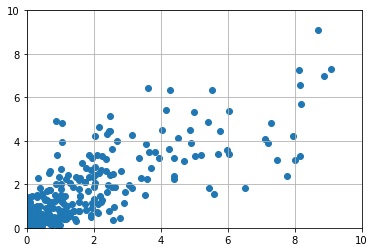

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(result['CHUVA'], result['tp'])
plt.xlim(0, 10)
plt.ylim(0,10)
plt.grid()

## Testes de Hipótese


In [ ]:
from scipy.stats import mannwhitneyu
import statsmodels as sm

In [ ]:
def testeMW(sample1, sample2):

  statMann, pMann = mannwhitneyu(sample1, sample2)
  hipotese(pMann)

def testeWaldwolf(sample1,sample2):
  statWald, pWald = sm.sandbox.stats.runs.runstest_2samp(sample1, sample2)
  hipotese(pWald)


def hipotese(p):
  print(f'p-valor: {p:.3f}')
  alpha = 0.05
  if p > alpha:
	  print('Mesma distribuição (falha ao rejeitar H0)')
  else:
	  print('Distribution diferente (H0 rejeitado)')



In [ ]:
indiceMetadeSerie = int((len(result['tp'])/2)) # divide  a série pela metade
amostra1 = result['tp'][0:indiceMetadeSerie]    #amostra com a metade inicial
amostra2 = result['tp'][indiceMetadeSerie:(len(result['tp'])-1)] #amostra com a metade final

In [ ]:
testeMW(amostra1, amostra2)

p-valor: 0.134
Mesma distribuição (falha ao rejeitar H0)


In [ ]:
#testeWaldwolf(amostra1, amostra2) # A biblioteca statsmodel não está estável, assim algumas vezes essas função não roda. Só precisa rodar mais de uma vez quando for o caso

In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(amostra1, amostra2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente independente')
else:
	print('Provavelmente dependente')

stat=0.000, p=1.000
Provavelmente independente


In [ ]:
from scipy import stats

stats.spearmanr(amostra1, amostra2)

SpearmanrResult(correlation=-0.22536053393307934, pvalue=0.0006792201746687402)

In [ ]:
from statsmodels.sandbox.stats.runs import runstest_2samp
runstest_2samp(amostra1, amostra2)

ties detected


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-0.6621789348084367, 0.5078565527775274)

P-valor acimda de 0.05 indica que são provavelmente independentes.

In [ ]:
from statsmodels.tsa.stattools import adfuller
stat, p, lags, obs, crit, t = adfuller(result['tp'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente não é estationário')
else:
	print('Provavelmente estationário')

stat=-4.166, p=0.001
Provavelmente estationário


O teste de adfuller foi realizado e estimou a série como estacionária.

### Tendência

#### MannKendall e Sen-Slope

Para análise da tendẽncia a biblioteca pymannkendall será utilizada. A documentação pode ser apreciada em: https://github.com/mmhs013/pymannkendall

In [ ]:
!pip install pymannkendall

In [ ]:
import pymannkendall as mk

mk.original_test(result['tp'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.35355961937443325, z=-0.9277069171954985, Tau=-0.029311167674196628, s=-2948.0, var_s=10091104.0, slope=-0.00012043023842680598, intercept=0.4096465673182033)

In [ ]:
mk.seasonal_test(result['tp'], period=12)

Seasonal_Mann_Kendall_Test(trend='no trend', h=False, p=0.63199863632895, z=-0.4789156509011953, Tau=-0.01589825119236884, s=-130.0, var_s=72554.0, slope=-0.0005396349089486259, intercept=0.39274337887763977)

In [ ]:
mk.seasonal_test(result['t2m'], period=12)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=3.601974274403119e-10, z=6.270367331963504, Tau=0.2066772655007949, s=1690.0, var_s=72556.0, slope=0.03684326171875, intercept=26.461636555989607)

Enquanto a váriavel tp (chuva) não demonstra tendência de alteração, a temperatura do ar tende a aumentar ao longo do tempo.

In [ ]:
mk.sens_slope(result['tp'])

Sens_Slope_Test(slope=-0.00012043023842680598, intercept=0.4096465673182033)

In [ ]:
import scipy.stats as stats
tau, p_value = stats.kendalltau(amostra1, amostra2)
print(tau)

p_value

-0.14252818351339963


0.0015022580705378798

####Pettitt

In [ ]:
!pip install pyhomogeneity

In [ ]:
import pyhomogeneity as hg


resultado = hg.pettitt_test(result['tp'])
print(resultado)

Pettitt_Test(h=False, cp=334, p=0.2273, U=5613.0, avg=mean(mu1=1.316371, mu2=0.8360955))


Os dados de chuva se apresentaram homogêneos. Logo não há tendência de alteração da série.

Todos os testes deste pacote retornam uma tupla contendo:

    h: True (if data is nonhomogeneous) or False (if data is homogeneous)
    cp: probable change point location
    p: p value of the significance test
    U/T/Q/R/V: test statistics which depends on the test method
    avg: mean values at before and after the change point


O teste de Pettitt demonstrou que os um ponto provável de mudança (cp) seria o da linha 334.

In [ ]:
result.iloc[334]

DT_MEDICAO     2011-06
TEMP_MED        25.364
CHUVA                0
tp            0.140904
t2m            25.3454
Name: 2011-06, dtype: object

As informações mostram que o mês de junho de 2011 seria esse ponto provável.

## Índices de Seca

### SPI

**Uma vez que um dos principais pacotes de índice climaticos em python na realidade utiliza bash para o seu processamento resolvi exportar os dados do ERA5 para txt afim de serem utilizados no script em R fornecido pelo professor. **.

O pacote supracitado pode ser encontrado em: https://climate-indices.readthedocs.io/en/latest/

In [ ]:
tabelaEra5 = tabelaEra5.reset_index(drop=True)
tabelaEra5


,tp,t2m
0,2.243132,26.472437
1,0.528485,27.565454
2,9.087366,25.965326
3,1.852529,24.651483
4,0.150726,24.467798
...,...,...
475,0.163947,24.956934
476,0.100862,26.793573
477,0.338850,29.294122
478,1.808710,27.216028


In [ ]:
tabelaEra5['tp'] = pd.to_numeric(tabelaEra5['tp'], downcast="float")
tabelaEra5['tp'][:].to_csv('tpERA5.txt', decimal=".", index=False, header = False, quoting=None, quotechar=" ") #Exportação dos dados

### Pacote RPY2

O pacote r2py possibilita a execução de comando R no ambiente python do colab. Isto facilitará na confecção de um relatório uniforme e que fique salvo na nuvem.

A documentação pode ser acessada através do link: https://rpy2.github.io/

In [ ]:
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R

install.packages('SCI')



2021-07-20 02:54:47,651 WARNING R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

2021-07-20 02:54:48,865 WARNING R[write to console]: also installing the dependencies ‘RcppArmadillo’, ‘goftest’, ‘Lmoments’, ‘fitdistrplus’, ‘lmomco’


2021-07-20 02:54:48,870 WARNING R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/RcppArmadillo_0.10.6.0.0.tar.gz'

2021-07-20 02:54:49,274 WARNING R[write to console]: Content type 'application/x-gzip'
2021-07-20 02:54:49,276 WARNING R[write to console]:  length 1673880 bytes (1.6 MB)

2021-07-20 02:54:49,279 WARNING R[write to console]: =
2021-07-20 02:54:49,282 WARNING R[write to console]: =
2021-07-20 02:54:49,292 WARNING R[write to console]: =
2021-07-20 02:54:49,295 WARNING R[write to console]: =
2021-07-20 02:54:49,297 WARNING R[write to console]: =
2021-07-20 02:54:49,300 WARNING R[write to console]: =
2021-07-20 02:54:49,303 WARNING R[write to console]: =
2021-07-20 02:54:4

In [ ]:
%%R
require("SCI")

2021-07-20 02:56:18,196 WARNING R[write to console]: Loading required package: SCI

2021-07-20 02:56:18,204 WARNING R[write to console]: Loading required package: fitdistrplus

2021-07-20 02:56:18,210 WARNING R[write to console]: Loading required package: MASS

2021-07-20 02:56:18,283 WARNING R[write to console]: Loading required package: survival

2021-07-20 02:56:19,352 WARNING R[write to console]: Loading required package: lmomco

2021-07-20 02:56:19,460 WARNING R[write to console]: # Package lmomco (2.3.6) loaded [try lmomcoNews()].



In [ ]:
%%R
# Cálculo de SPI
PRECIP <- read.table("tpERA5.txt")


In [ ]:
%%R
library("SCI")
spi.para <- fitSCI(PRECIP[,1],first.mon=1,time.scale=6,distr="gamma",p0=TRUE)



In [ ]:
%%R
spi <- transformSCI(PRECIP[,1],first.mon=1,obj=spi.para)


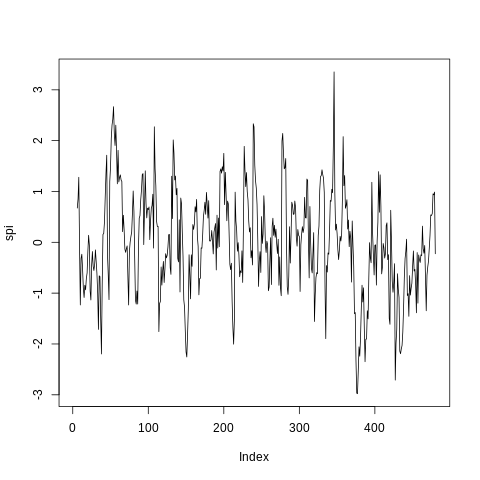

In [ ]:
%%R
plot(spi,t="l")

Os dados do SPI foram gerados para Petrolina como o esperado e demonstrado em aulas.

In [ ]:
%%R
write.csv(spi, file = "SPI.csv") #Exportação dos dados do SPI em formato csv

### SPEI

Para o SPEI teremos que recorrer novamente à API do CDS afim de baixar os dados de umidade relativa.

In [ ]:
import xarray as xr #biblioteca para processar os dados
from urllib.request import urlopen

# flag para o download data
download_flag = False

c2 = cdsapi.Client()

fl2 = c2.retrieve(
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': 'relative_humidity',
        'pressure_level': '1000',
        'year': [
            '1981', '1982', '1983',
            '1984', '1985', '1986',
            '1987', '1988', '1989',
            '1990', '1991', '1992',
            '1993', '1994', '1995',
            '1996', '1997', '1998',
            '1999', '2000', '2001',
            '2002', '2003', '2004',
            '2005', '2006', '2007',
            '2008', '2009', '2010',
            '2011', '2012', '2013',
            '2014', '2015', '2016',
            '2017', '2018', '2019',
            '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            -7.5, -41.5, -9.6,
            -9.6,
        ],
    },
    'download.nc')


#Escolha de diretório no google drive
PernambucoERA5UR = './drive/MyDrive/CRH/PernambucoERA5UR.nc'

#Caso a flag esteja como True o download do arquivo em netcdf será realizado e
#persistido no diretório especificado no google drive
if download_flag:
  fl2.download(PernambucoERA5UR)

#leitura dos dados
with urlopen(fl2.location) as f2:
    ds2 = xr.open_dataset(f2.read())
    print(ds2)

2021-07-20 02:56:20,297 INFO Welcome to the CDS
2021-07-20 02:56:20,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2021-07-20 02:56:20,471 INFO Request is completed
2021-07-20 02:56:20,473 INFO Downloading https://download-0000.copernicus-climate.eu/cache-compute-0000/cache/data0/adaptor.mars.internal-1626480151.5846174-20858-17-fb5823ac-91a8-4fd3-b50d-1690362be16e.nc to download.nc (1.1M)
2021-07-20 02:56:22,262 INFO Download rate 607.4K/s


<xarray.Dataset>
Dimensions:    (latitude: 9, longitude: 128, time: 480)
Coordinates:
  * longitude  (longitude) float32 -41.5 -41.25 -41.0 ... -10.25 -10.0 -9.75
  * latitude   (latitude) float32 -7.6 -7.85 -8.1 -8.35 ... -9.1 -9.35 -9.6
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-12-01
Data variables:
    r          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-17 00:02:32 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...


As informações acima indicam as informações básicas do conjunto de dados da umidade relativa.

In [ ]:
#Transformação dos dados em dataframe
df2 = ds2.to_dataframe()

df2

r
latitude longitude time                 
-7.6     -41.50    1981-01-01  72.435432
                   1981-02-01  54.483418
                   1981-03-01  71.493050
                   1981-04-01  69.638603
                   1981-05-01  55.008308
...                                  ...
-9.6     -9.75     2020-08-01  72.422440
                   2020-09-01  76.667488
                   2020-10-01  76.863235
                   2020-11-01  77.601204
                   2020-12-01  78.064598

[552960 rows x 1 columns]

Novamente se faz necessária a busca pelo ponto no conjunto de dados acima, o qual contêm os dados de umidade relativa mais próximos da estação do INMET. Isto será realizado pela função geo_idx:

In [ ]:
lats_ERA5UR = ds2.variables['latitude'][:]
lons_ERA5UR = ds2.variables['longitude'][:]

lat_idxUR = geo_idx(inmet_lat, lats_ERA5UR)
lon_idxUR = geo_idx(inmet_lon, lons_ERA5UR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  """


In [ ]:
print(lat_idxUR.values)
print(lon_idxUR.values)

7
4


In [ ]:
ds2.r.isel(latitude=lat_idxUR.values, longitude=lon_idxUR.values)

<xarray.DataArray 'r' (time: 480)>
array([64.38275 , 54.130024, 73.87066 , ..., 44.06179 , 59.828484, 46.79279 ],
      dtype=float32)
Coordinates:
    longitude  float32 -40.5
    latitude   float32 -9.35
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-12-01
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

O ponto encontrado tem coordenadas -9,35 e -40,5. Verificamos então a série em um formato gráfico:

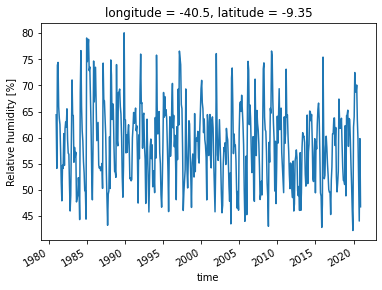

In [ ]:
ds2.r.isel(latitude=lat_idxUR.values, longitude=lon_idxUR.values).plot()

In [ ]:
delta = 0.1
latitude1UR = str(lats_ERA5UR[lat_idx].values + delta )
latitude2UR = str(lats_ERA5UR[lat_idx].values - delta)
longitude1UR = str(lons_ERA5UR[lon_idx].values + delta)
longitude2UR = str(lons_ERA5UR[lon_idx].values - delta)

tabelaEra5UR = (df2.query('latitude < ' + latitude1UR + ' and latitude > ' + latitude2UR + ' and longitude < ' + longitude1UR + ' and longitude > ' + longitude2UR))
tabelaEra5UR

r
latitude longitude time                 
-9.6     -40.5     1981-01-01  64.180069
                   1981-02-01  55.126972
                   1981-03-01  73.792702
                   1981-04-01  74.182472
                   1981-05-01  66.585396
...                                  ...
                   2020-08-01  61.718445
                   2020-09-01  53.373867
                   2020-10-01  45.746468
                   2020-11-01  60.682518
                   2020-12-01  47.881554

[480 rows x 1 columns]

In [ ]:
tabelaEra5UR=tabelaEra5UR.reset_index(drop=True)

tabelaEra5UR["r"] = pd.to_numeric(tabelaEra5UR["r"], downcast="float")

tabelaTempChuva = pd.concat([dftabela[0:fimTabela], tabelaEra5UR], axis=1).reindex(dftabela[0:fimTabela].index)


In [ ]:
tabelaTempChuva['t2mFahrenheit'] = (tabelaTempChuva['t2m'] * 1.8) + 32 #Conversão de celsius para fahrenheit

In [ ]:
tabelaTempChuva['CH'] = 0.158 * ((100 - tabelaTempChuva['r']) ** 0.5) #cálculo de CH


In [ ]:
tabelaTempChuva

,time,tp,t2m,r,t2mFahrenheit,CH
0,1981-01-01,2.243132,26.472437,64.180069,79.650386,0.945626
1,1981-02-01,0.528485,27.565454,55.126972,81.617817,1.058400
2,1981-03-01,9.087366,25.965326,73.792702,78.737587,0.808850
3,1981-04-01,1.852529,24.651483,74.182472,76.372670,0.802813
4,1981-05-01,0.150726,24.467798,66.585396,76.042036,0.913325
...,...,...,...,...,...,...
475,2020-08-01,0.163947,24.956934,61.718445,76.922480,0.977579
476,2020-09-01,0.100862,26.793573,53.373867,80.228431,1.078877
477,2020-10-01,0.338850,29.294122,45.746468,84.729420,1.163781
478,2020-11-01,1.808710,27.216028,60.682518,80.988850,0.990718


##### Tabela Hargreaves

A tabela de Hargreaves foi gerada no excel e importada para o colab:


In [ ]:
hargreavesF = pd.read_csv('./drive/MyDrive/CRH/hargravesF.csv', header=0)
hargreavesF.head(10)

,LAT,1,2,3,4,5,6,7,8,9,10,11,12
0,0,2255,2008,2350,2211,2165,2023,2123,2237,2200,2343,2205,2229.0
1,-1,2288,2117,2354,2197,2137,1990,2091,2216,2256,2358,2234,2265.0
2,-2,2371,2136,2357,2182,2108,1936,2059,2194,2251,2372,2263,2301.0
3,-3,2353,2154,2360,2167,2079,1902,2076,2172,2246,2386,2290,2337.0
4,-4,2385,2172,2362,2151,2050,1908,1993,2150,2240,2398,2318,2372.0
5,-5,2416,2189,2363,2134,2020,1854,1960,2126,2234,2411,2345,2407.0
6,-6,2447,2205,2363,2117,1989,1800,1926,2103,2226,2422,2371,2442.0
7,-7,2479,2221,2363,2099,1959,1785,1893,2078,2218,2433,2397,2476.0
8,-8,2509,2237,2362,2081,1927,1700,1858,2054,2210,2443,2423,2520.0
9,-9,2538,2251,2360,2062,1896,1715,1824,2028,2201,2453,2448,2544.0


In [ ]:
hargreavesFEstacao = hargreavesF.iloc[9:11] # slicing dos dados interessados
#hargreavesFEstacao = hargreavesFEstacao.drop(['0'],axis=1)
hargreavesFEstacao = hargreavesFEstacao.append(pd.Series([np.nan]),  ignore_index = True) #inclusão de linha vazia para a interpolação
hargreavesFEstacao = hargreavesFEstacao.drop([0], axis=1)
hargreavesFEstacao.loc[2, 'LAT'] = -9.6
hargreavesFEstacao.set_index('LAT', inplace=True)
hargreavesFEstacao = hargreavesFEstacao.sort_index()

hargreavesFEstacao = hargreavesFEstacao / 1000
hargreavesFEstacao

,1,2,3,4,5,6,7,8,9,10,11,12
LAT,,,,,,,,,,,,
-10.0,2.567,2.266,2.357,2.043,1.864,1.673,1.789,2.003,2.191,2.462,2.473,2.577
-9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9.0,2.538,2.251,2.360,2.062,1.896,1.715,1.824,2.028,2.201,2.453,2.448,2.544


In [ ]:
hargreavesFEstacao = hargreavesFEstacao.interpolate(method='linear', axis=0) #interpolação linear
hargreavesFEstacao = hargreavesFEstacao.iloc[1].T
hargreavesFEstacao

1     2.5525
2     2.2585
3     2.3585
4     2.0525
5     1.8800
6     1.6940
7     1.8065
8     2.0155
9     2.1960
10    2.4575
11    2.4605
12    2.5605
Name: -9.6, dtype: float64

A série acima (hargreavesFEstacao) possui os valores para a estação em questão.

In [ ]:
tabelaTempChuva['mes'] = pd.DatetimeIndex(tabelaTempChuva['time']).month

In [ ]:
#concatenação dos dados de F na tabela geral
for i in range(0,12):
  mes = i + 1
  tabelaTempChuva.loc[tabelaTempChuva.mes == mes, 'F'] = hargreavesFEstacao[i]


In [ ]:
tabelaTempChuva = tabelaTempChuva.drop(['mes'], axis=1)
tabelaTempChuva.head()

,time,tp,t2m,r,t2mFahrenheit,CH,F
0,1981-01-01,2.243132,26.472437,64.180069,79.650386,0.945626,2.5525
1,1981-02-01,0.528485,27.565454,55.126972,81.617817,1.058400,2.2585
2,1981-03-01,9.087366,25.965326,73.792702,78.737587,0.808850,2.3585
3,1981-04-01,1.852529,24.651483,74.182472,76.372670,0.802813,2.0525
4,1981-05-01,0.150726,24.467798,66.585396,76.042036,0.913325,1.8800


In [ ]:
#cálculo de ETP
tabelaTempChuva['ETP'] = tabelaTempChuva['t2mFahrenheit'] * tabelaTempChuva['CH'] * tabelaTempChuva['F']

In [ ]:
tabAcumulado = df_projeta['CHUVA']
tabAcumulado = tabAcumulado.groupby(pd.Grouper(freq='1M', origin='start')).sum() #agrupamento de dados mensais
tabAcumulado = tabAcumulado.reset_index()


In [ ]:
tabelaTempChuvaETP = pd.concat([tabelaTempChuva[0:fimTabela], tabAcumulado], axis=1).reindex(tabelaTempChuva[0:fimTabela].index) #concatenação de dados
tabelaTempChuvaETP=tabelaTempChuvaETP.drop(['DT_MEDICAO'],axis=1)
tabelaTempChuvaETP['P-ETP'] = tabelaTempChuvaETP['CHUVA'] - tabelaTempChuvaETP['ETP'] #cálculo de P - ETP
tabelaTempChuvaETP

,time,tp,t2m,r,t2mFahrenheit,CH,F,ETP,CHUVA,P-ETP
0,1981-01-01,2.243132,26.472437,64.180069,79.650386,0.945626,2.5525,192.252990,39.299999,-152.952991
1,1981-02-01,0.528485,27.565454,55.126972,81.617817,1.058400,2.2585,195.098921,15.200001,-179.898921
2,1981-03-01,9.087366,25.965326,73.792702,78.737587,0.808850,2.3585,150.205633,278.100006,127.894373
3,1981-04-01,1.852529,24.651483,74.182472,76.372670,0.802813,2.0525,125.844883,97.299995,-28.544888
4,1981-05-01,0.150726,24.467798,66.585396,76.042036,0.913325,1.8800,130.568030,0.000000,-130.568030
...,...,...,...,...,...,...,...,...,...,...
475,2020-08-01,0.163947,24.956934,61.718445,76.922480,0.977579,2.0155,151.561187,4.400000,-147.161187
476,2020-09-01,0.100862,26.793573,53.373867,80.228431,1.078877,2.1960,190.078246,0.600000,-189.478246
477,2020-10-01,0.338850,29.294122,45.746468,84.729420,1.163781,2.4575,242.325358,2.100000,-240.225358
478,2020-11-01,1.808710,27.216028,60.682518,80.988850,0.990718,2.4605,197.423367,163.099991,-34.323376


observação: o pacote pyeto tem divesas funções para o cálculo de evapotranspiração. A documentação pode ser encontrada em:https://pyeto.readthedocs.io/en/latest/

Neste trabalho não foi utilizada esta biblioteca.

In [ ]:
tabelaTempChuvaETP['P-ETP'] = pd.to_numeric(tabelaTempChuvaETP['P-ETP'], downcast="float") #convesão de dados em float
tabelaTempChuvaETP['P-ETP'][:].to_csv('ETP_ERA5.txt', decimal=".", index=False, header = False, quoting=None, quotechar=" ") #exportação dos dados de ETP

De posse dos dados acima em formato txt pode-se utilizar o script fornecido pelo professor. O resultado do processamento retornará o SPEI

In [ ]:
%%R

require("SCI")

# Cálculo de SPEI
D <- read.table("ETP_ERA5.txt")

## apply SCI transformation
spei.para <- fitSCI(D[,1],first.mon=1,time.scale=6,p0=TRUE,distr="logis")
spei <- transformSCI(D[,1],first.mon=1,obj=spei.para)


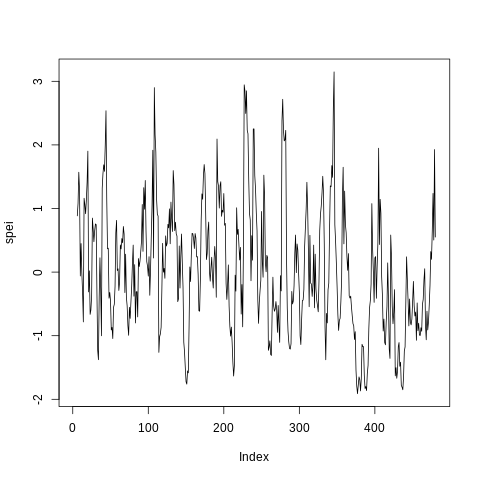

In [ ]:
%%R

write.csv(spei, file = "SPEI.csv")
plot(spei,t="l")

### NDVI

O NDVI e demais indíces foram produzidos no ambiente Google Earth Engine. O Pacote geemap possibilita de maneira amigável o processamento das imagens em python, no entanto como o pacote ainda não suporta a exportação dos dados em csv, os dados a seguir foram exportados do GEE e posteriormente importados no Colab.

In [ ]:
modisNDVI = pd.read_csv('./drive/MyDrive/CRH/NDVIModis.csv', header=0)
modisNDVI['data'] =  pd.to_datetime(modisNDVI['data'], format='%b %Y ')
modisNDVI[' ndvi'] = modisNDVI[' ndvi']/10
modisNDVI.set_index('data', inplace=True)

modisNDVI

,ndvi
data,
2010-01-01,0.6501
2010-01-01,0.6219
2010-02-01,0.6073
2010-02-01,0.5748
2010-03-01,0.5330
...,...
2020-10-01,0.3560
2020-11-01,0.5426
2020-11-01,0.5514


In [ ]:
modisNDVI.describe()

,ndvi
count,253.000000
mean,0.448045
std,0.121549
min,0.188900
25%,0.355200
50%,0.442200
75%,0.532300
max,0.730200


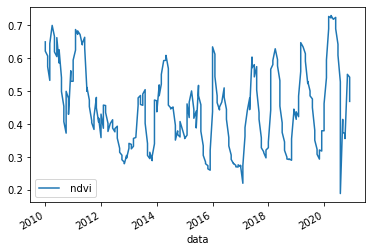

In [ ]:
modisNDVI.plot()

O NDVI mínimo foi de 0.18 e o máximo de 0.73 durante o período de 2010 a 2020 para Petrolina.

### LST

In [ ]:
modisLST = pd.read_csv('./drive/MyDrive/CRH/LSTModis2.csv', header=0, decimal=',')
modisLST['data'] =  pd.to_datetime(modisLST['data'], format='%b %Y')
#modisLST.set_index('data', inplace=True)
modisLST['lst'] = modisLST['lst'] * 0.02 - 273.15
modisLST

,data,lst
0,2010-01-01,30.97
1,2010-01-01,32.61
2,2010-01-01,33.85
3,2010-01-01,34.61
4,2010-02-01,36.61
...,...,...
501,2020-11-01,32.41
502,2020-12-01,33.07
503,2020-12-01,34.67
504,2020-12-01,33.83


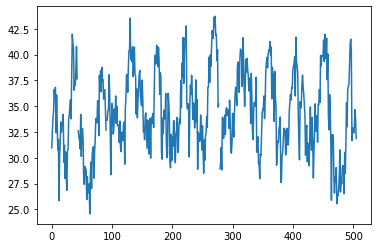

In [ ]:
modisLST['lst'].plot()

Uma vez que os dados de LST tem resolução temporal de 8 dias deve-se ajustar os dados para o posterior cálculo do VHI.

In [ ]:
lista = []
dim = len(modisLST['lst']) -1

for i in range(0,dim,2):
  lista.append(((modisLST['lst'][i] + modisLST['lst'][i+1])/2))



In [ ]:
temperatura =pd.Series(lista)
temp = temperatura.to_frame()
modis = modisNDVI.reset_index(drop=True)
modis['temp'] = temp


### VHI

In [ ]:
ndviMin = modis[' ndvi'].min()
ndviMax = modis[' ndvi'].max()
tempMin = modis['temp'].min()
tempMax = modis['temp'].max()

In [ ]:
modis['vci'] = ((modis[' ndvi'] - ndviMin) / ( ndviMax - ndviMin)) * 100
modis['tci'] = 100 * (tempMax - modis['temp']) / ( tempMax - tempMin)
modis['VHI'] = 0.5 * modis['vci'] + 0.5 * modis['tci']
modis

,ndvi,temp,vci,tci,VHI
0,0.6501,31.79,85.202291,66.414435,75.808363
1,0.6219,34.23,79.992610,52.211874,66.102242
2,0.6073,36.17,77.295400,40.919674,59.107537
3,0.5748,34.63,71.291336,49.883586,60.587461
4,0.5330,34.61,63.569185,50.000000,56.784593
...,...,...,...,...,...
248,0.3560,40.92,30.870127,13.271246,22.070687
249,0.5426,32.29,65.342694,63.504075,64.423384
250,0.5514,32.57,66.968409,61.874272,64.421341
251,0.5427,33.87,65.361168,54.307334,59.834251


In [ ]:
modis['VHI'].describe()

count    250.000000
mean      49.446378
std       20.966913
min        6.927766
25%       32.915983
50%       49.912719
75%       63.871535
max       99.068685
Name: VHI, dtype: float64


| Classificação da seca    |   	| VHI       |
|-----------------	|---	|-----------------|
| Normal          	|   	| VHI > 40       	|
| Seca Suave       	|   	| 30 < VHI ≤ 40    |
| Seca Moderada    	|   	| 20 < VHI ≤ 30    |
| Seca Severa     	|   	| 10 < VHI ≤ 20    |
| Seca Extrema    	|   	| VHI ≤ 10  	|


A média do VHI para Petrolina no perído estudado ficou caracterizada como Seca Moderada.

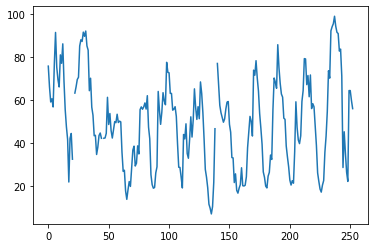

In [ ]:
modis['VHI'].plot()

observação: os picos que aparecem, são devido aos dias que faltam dados de temperatura. Desconsidera-los.

### NVSWI

In [ ]:
modis['vswi'] = modis[' ndvi'] / modis['temp']

vswiMin = modis['vswi'].min()
vswiMax = modis['vswi'].max()

modis['NVSWI'] = (modis['vswi'] - vswiMin) / (vswiMax - vswiMin) * 100

modis

,ndvi,temp,vci,tci,VHI,vswi,NVSWI
0,0.6501,31.79,85.202291,66.414435,75.808363,0.020450,67.041182
1,0.6219,34.23,79.992610,52.211874,66.102242,0.018168,56.700900
2,0.6073,36.17,77.295400,40.919674,59.107537,0.016790,50.455109
3,0.5748,34.63,71.291336,49.883586,60.587461,0.016598,49.585701
4,0.5330,34.61,63.569185,50.000000,56.784593,0.015400,44.155529
...,...,...,...,...,...,...,...
248,0.3560,40.92,30.870127,13.271246,22.070687,0.008700,13.789075
249,0.5426,32.29,65.342694,63.504075,64.423384,0.016804,50.517682
250,0.5514,32.57,66.968409,61.874272,64.421341,0.016930,51.087487
251,0.5427,33.87,65.361168,54.307334,59.834251,0.016023,46.978389


In [ ]:
modis['NVSWI'].describe()

count    250.000000
mean      35.389161
std       22.544289
min        0.000000
25%       16.343631
50%       32.222211
75%       49.377830
max      100.000000
Name: NVSWI, dtype: float64


| Classificação da seca    |   	| NVSWI       |
|-----------------	|---	|-----------------|
| Úmido          	|   	| NVSWI > 80       	|
| Normal       	|   	| 60 < NVSWI ≤ 80    |
| Seca Leve    	|   	| 40 < NVSWI ≤ 60    |
| Seca Moderada     	|   	| 20 < NVSWI ≤ 40    |
| Seca Severa    	|   	| NVSWI ≤ 20  	|

O NVSWI médio foi de aproximadamente 56, caracterizando a região com seca leve entre 2010 e 2020.

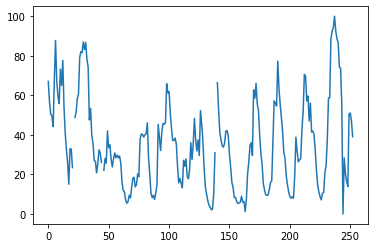

In [ ]:
modis['NVSWI'].plot()

### SMCI

O SMCI para a região de Petrolina entre 2000 e 2020 será apresentado a seguir

In [ ]:
esa = pd.read_csv('./drive/MyDrive/CRH/esa.csv', header=0, delimiter='\s')
esa.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,"""V1"""
"""1""",NaN
"""2""",0.145199
"""3""",0.275387
"""4""",0.131571
"""5""",0.101473


In [ ]:
SSMmax= esa['"V1"'].max()
SSMmin= esa['"V1"'].min()


In [ ]:
esa['SMCI'] = 100 * ((esa['"V1"'] - SSMmin)/(SSMmax - SSMmin))
esa.head()

,"""V1""",SMCI
"""1""",NaN,NaN
"""2""",0.145199,21.976531
"""3""",0.275387,61.696216
"""4""",0.131571,17.818896
"""5""",0.101473,8.636093


In [ ]:
esa['SMCI'].describe()

count    6273.000000
mean       25.702952
std        15.452061
min         0.000000
25%        13.707272
50%        21.154145
75%        34.821974
max       100.000000
Name: SMCI, dtype: float64

O índice se manteve em média em torno de 25 durante as últimas duas decadas.

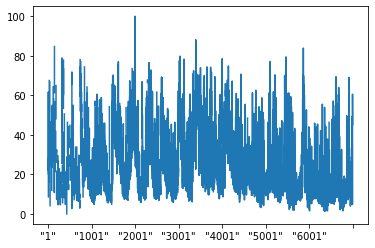

In [ ]:
esa['SMCI'].plot()

### Budyko Framework

In [ ]:
budyko = pd.read_csv('./drive/MyDrive/CRH/Budyko_relatorio.csv')
budyko.head()

,Ano,Q_Tracunhaem,Q_Tapacura,Q_Ipojuca,Q_Una,Q_Pajeu,P_Tracunhaem,P_Tapacura,P_Ipojuca,P_Una,P_Pajeu,ETP_Tracunhaem,ETP_Tapacura,ETP_Ipojuca,ETP_Una,ETP_Pajeu,ETP_P_Tracunhaem,ETP_P_Tapacura,ETP_P_Ipojuca,ETP_P_Una,ETP_P_Pajeu,E_Tracunhaem,E_Tapacura,E_Ipojuca,E_Una,E_Pajeu,E_P_Tracunhaem,E_P_Tapacura,E_P_Ipojuca,E_P_Una,E_P_Pajeu
0,1979.0,508.94,41.04,155.94,33.36,19.53,1103.70,955.00,496.92,499.87,623.60,1551.76,1591.71,1802.66,1834.04,2206.05,1.41,1.67,3.63,3.67,3.54,594.76,913.97,340.98,466.51,604.07,0.54,0.96,0.69,0.93,0.97
1,1980.0,351.63,44.36,104.68,15.94,36.06,909.02,1160.47,487.64,432.21,482.27,1518.30,1557.53,1764.64,1796.14,2170.22,1.67,1.34,3.62,4.16,4.50,557.39,1116.11,382.96,416.28,446.21,0.61,0.96,0.79,0.96,0.93
2,1981.0,237.91,88.45,226.62,132.99,117.61,881.54,875.45,659.34,602.05,538.18,1534.37,1564.38,1754.76,1787.82,2150.86,1.74,1.79,2.66,2.97,4.00,643.62,787.01,432.72,469.06,420.57,0.73,0.90,0.66,0.78,0.78
3,1982.0,305.57,73.92,152.28,57.64,23.78,1004.77,1023.37,521.99,615.92,436.99,1516.59,1554.99,1762.41,1795.57,2176.00,1.51,1.52,3.38,2.92,4.98,699.20,949.45,369.71,558.28,413.22,0.70,0.93,0.71,0.91,0.95
4,1983.0,116.16,43.61,69.29,10.28,8.21,762.67,833.58,465.82,432.59,417.19,1556.61,1600.47,1824.84,1861.05,2267.75,2.04,1.92,3.92,4.30,5.44,646.51,789.97,396.53,422.32,408.99,0.85,0.95,0.85,0.98,0.98


obs: Implementar cálculo de w em python e pelo google earth engine. Referência: https://mygeoblog.com/2016/11/28/the-budyko-curve/

## Mudanças Climáticas

### API PROJETA

Manual de utilização da API:  
https://projeta.cptec.inpe.br/#/api

O site gera de maneira amigável o link necessário para a requisição dos dados. Segue o gif com a demonstração:

![projeta](https://media.giphy.com/media/ZYBPbSUlf11t6MURNr/giphy.gif)

In [ ]:
#requisação dos dados do projeta
response_projeta = requests.get('https://projeta.cptec.inpe.br/api/v1/public/ETA/17/MONTHLY/3/1/1961/12/1990/PREC/-9.383333/-40.5/').json()
#requisição dos dados do INMET
response_inmet = requests.get('https://apitempo.inmet.gov.br/normais/consulta/1/N208/82983').json()

In [ ]:
df_projeta = pd.DataFrame.from_dict(response_projeta)
df_projeta.head()

,value,date,time,variable,lat,lng
0,105.328659,1961-01-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994
1,126.111458,1961-02-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994
2,60.088303,1961-03-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994
3,53.314522,1961-04-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994
4,7.182036,1961-05-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994


In [ ]:
df_projeta['date'] =  pd.to_datetime(df_projeta['date'], format='%Y-%m-%d')
df_projeta.set_index('date', inplace=True)

In [ ]:
df_projeta_media_mensal = df_projeta.groupby(df_projeta.index.month).mean()
df_projeta_media_mensal.reset_index(inplace = True)
df_projeta_media_mensal

,date,value
0,1,74.256452
1,2,83.179056
2,3,77.468180
3,4,46.833511
4,5,6.292696
5,6,3.541074
6,7,1.848299
7,8,1.438151
8,9,1.782439
9,10,8.202111


In [ ]:
df_inmet = pd.DataFrame.from_dict(response_inmet)

result = pd.concat([df_inmet[0:12], df_projeta_media_mensal], axis=1).reindex(df_inmet[0:12].index)
result

,MES_MEDICAO,CD_ESTACAO,VALOR,date,value
0,01,82983,81.9,1,74.256452
1,02,82983,105.9,2,83.179056
2,03,82983,136.3,3,77.468180
3,04,82983,93.6,4,46.833511
4,05,82983,21.7,5,6.292696
5,06,82983,5.1,6,3.541074
6,07,82983,8.7,7,1.848299
7,08,82983,2.4,8,1.438151
8,09,82983,5.6,9,1.782439
9,10,82983,11.9,10,8.202111


In [ ]:
result["VALOR"] = pd.to_numeric(result["VALOR"], downcast="float")
result["value"] = pd.to_numeric(result["value"], downcast="float")

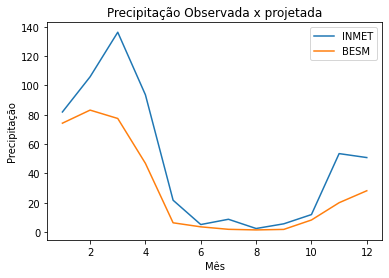

In [ ]:
import matplotlib.pyplot as plt

x = result['date']
y1 = result['VALOR']
y2 = result['value']

plt.plot(x, y1, label = "INMET")
plt.plot(x, y2, label = "BESM")


plt.xlabel('Mês')
plt.ylabel('Precipitação')
plt.title('Precipitação Observada x projetada')
plt.legend()
plt.show()

Aparentemente os dados do PROJETA subestimam a chuva, visto que no período chuvoso de Petrolina (início do ano) a discrepancia chega a ser de próxima de 100%.

### Correção de erros sistemáticos

In [ ]:
deltaBase =  result['VALOR'] - result['value']
deltaBase

0      7.643547
1     22.720947
2     58.831825
3     46.766487
4     15.407305
5      1.558926
6      6.851701
7      0.961850
8      3.817561
9      3.697888
10    33.501030
11    22.640835
dtype: float32

In [ ]:
baseCorregida = result['value'] + deltaBase
baseCorregida

0      81.900002
1     105.900002
2     136.300003
3      93.599998
4      21.700001
5       5.100000
6       8.700000
7       2.400000
8       5.600000
9      11.900000
10     53.500000
11     50.799999
dtype: float32

In [ ]:
projetaFuturo = requests.get('https://projeta.cptec.inpe.br/api/v1/public/ETA/20/MONTHLY/3/1/2021/12/2030/PREC/-9.383333/-40.5/').json()
projetaFuturo = pd.DataFrame.from_dict(projetaFuturo)
projetaFuturo.head()

,value,date,time,variable,lat,lng
0,216.681213,2021-01-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994
1,195.382263,2021-02-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994
2,137.898392,2021-03-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994
3,81.764008,2021-04-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994
4,39.364494,2021-05-01,00:00:00,PREC,-9.375000000000004,-40.474999999999994


In [ ]:
projetaFuturo['date'] =  pd.to_datetime(projetaFuturo['date'], format='%Y-%m-%d')
projetaFuturo['mes'] = pd.DatetimeIndex(projetaFuturo['date']).month
projetaFuturo.set_index('date', inplace=True)

In [ ]:
normalFuturo = projetaFuturo.groupby(pd.Grouper(key="mes")).mean()


In [ ]:
projetaFuturo.set_index('mes', inplace=True)


In [ ]:
full = pd.concat([projetaFuturo, normalFuturo.reindex(projetaFuturo.index)], axis=1)


In [ ]:
base = pd.DataFrame(result['VALOR'])

In [ ]:
normalFuturoDF = normalFuturo.reset_index(drop=True)
normalFuturoDF["value"] = pd.to_numeric(normalFuturoDF["value"], downcast="float")
deltaFuturo = normalFuturoDF['value'] - base['VALOR']
deltaFuturo = deltaFuturo.to_frame()
deltaFuturo['mes'] = [1,2,3,4,5,6,7,8,9,10,11,12]
deltaFuturo.set_index('mes', inplace=True)


In [ ]:
futuroCor = pd.concat([full, deltaFuturo.reindex(full.index)], axis=1)
futuroCor.head()

,value,time,variable,lat,lng,value,0
mes,,,,,,,
1,216.681213,00:00:00,PREC,-9.375000000000004,-40.474999999999994,139.818983,57.918983
2,195.382263,00:00:00,PREC,-9.375000000000004,-40.474999999999994,187.255830,81.355827
3,137.898392,00:00:00,PREC,-9.375000000000004,-40.474999999999994,173.814758,37.514755
4,81.764008,00:00:00,PREC,-9.375000000000004,-40.474999999999994,118.472686,24.872688
5,39.364494,00:00:00,PREC,-9.375000000000004,-40.474999999999994,44.607313,22.907310


observação: os dados corrigidos se encontram no final da tabela, com índice value e 0.

In [ ]:
futuroCor.to_csv('besmFuturoCorrigido.csv') #exportação da série de dados corrigidos em formato csv